# <font color = green|><b><p style = 'text-align:center'>Calculus using Partial Derivatives 

### <font color = yellow>Automatic Differention

`Let's use them to calculate  𝑑𝑦/𝑑𝑥  at  𝑥 = 5  where:`

`𝑦 = 𝑥2`

`𝑑𝑦/𝑑𝑥 = 2𝑥 = 2(5) = 10`

In [100]:
# Autodiff with PyTorch
import torch 
x = torch.tensor(5.0)
x 

tensor(5.)

In [101]:
x.requires_grad_() # contagiously track gradients through forward pass

tensor(5., requires_grad=True)

In [102]:
y = x**2

In [103]:
y.backward() # use autodiff 
print(y.backward)

<bound method Tensor.backward of tensor(25., grad_fn=<PowBackward0>)>


In [104]:
x.grad 
print(x.grad)

tensor(10.)


`Partial Derivative using Gradients Applied to Machine Learning `

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

`Partial Derivative of Multivariate Functions`

`Define a function f(x,y) = z = x^2 - y^2`

In [106]:
def f(x, y):
    return x**2 - y**2

`Plot z with respect to x by varying x ...`

In [107]:
xs = np.linspace(-3, 3, 1000)
print(xs)

[-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.51351351 -2.

In [108]:
# .. while holding y constant (e.g. at y = 0)

In [109]:
zs_wrt_x = f(xs, 0)

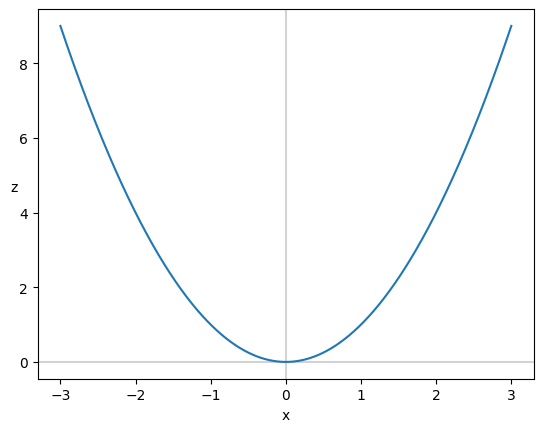

In [110]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

<font color = green|>To determine the slope of  𝑧  w.r.t.  𝑥  at a given point along the curve, we can use the partial derivative from the slides:
$$ \frac{∂𝑧}{∂𝑥}=2𝑥 $$

In [111]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [112]:
x_samples = [-2, -1, 0, 1, 2]

In [113]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [114]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):
    my_z = my_f(my_x, my_y)             # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y)      # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m * my_x   # Line is z = mx + b, so b = z - mx
    tangent_line = tangent_m * my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col,linestyle='dashed', linewidth=0.7, zorder=3)

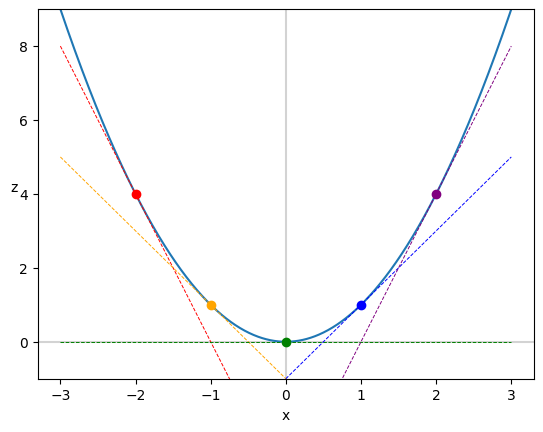

In [115]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $ \frac{∂𝑧}{∂𝑥}=2𝑥 $.
That is, the slope of  𝑧  along the  𝑥  axis is twice the  𝑥  value.

In [116]:
# Now let's plot  𝑧  with respect to  𝑦  by varying  𝑦 ...
ys = np.linspace(-3, 3, 1000)

In [117]:
# while holding  𝑥  constant (e.g., at  𝑥  = 0)

In [118]:
zs_wrt_y = f(0, ys) 

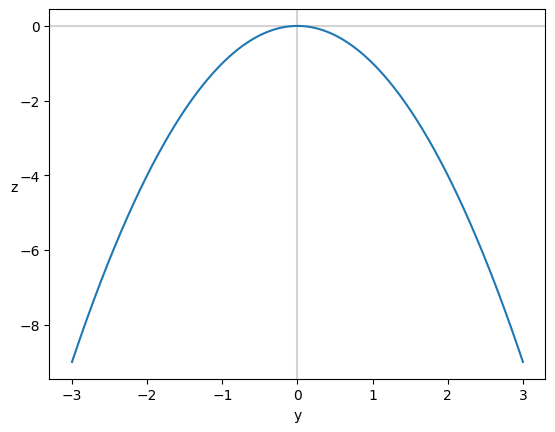

In [119]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [120]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [121]:
y_samples = [-2, -1, 0, 1, 2]

In [122]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

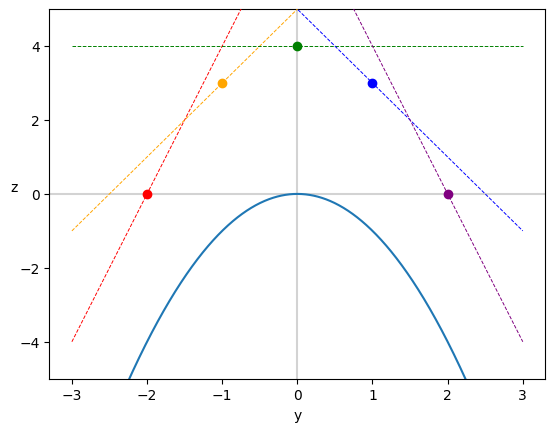

In [123]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

```Thereby visually demonstrating  ∂𝑧∂𝑦=−2𝑦 .```

```That is, the slope of  𝑧  along the  𝑦  axis is twice the  𝑦  value and inverted, resulting in the parabolic curve opening downward.```

```Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of  𝑧  with respect to both  𝑥  and  𝑦  at any given point  (𝑥,𝑦,𝑧) : ```

In [124]:
x = torch.tensor(0.).requires_grad_() 
x

tensor(0., requires_grad=True)

```In this code snippet, x is a torch.Tensor object with a value of 0.0 and the requires_grad_() function call enables gradient tracking for x. The trailing underscore in requires_grad_() indicates that it is an in-place operation that modifies the requires_grad attribute of the tensor.```

```This gradient tracking feature is useful when you want to perform automatic differentiation and update the tensor's value based on the computed gradients. It allows you to apply backpropagation and optimize the tensor's value with respect to some loss function or objective.```

In [125]:
y = torch.tensor(0.).requires_grad_() 
y

tensor(0., requires_grad=True)

In [126]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [127]:
z.backward() # Autodiff

```As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the  𝑥  and  𝑦  axes:```

In [128]:
x.grad # find grdient of tensor x

tensor(0.)

In [129]:
y.grad

tensor(-0.)

```In this notebook, we use the PyTorch automatic differentiation library to fit a straight line to data points. Thus, here we use calculus to solve the same regression problem that we used the Moore-Penrose Pseudoinverse to solve in the Linear Algebra II notebook.```

In [130]:
# Regression in PyTorch
import torch 
import matplotlib.pyplot as plt 

In [131]:
x = torch.tensor ([0,1,2,3,4,5,6,7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

```The  𝑦  values were created using the equation of a line  𝑦=𝑚𝑥+𝑏 . This way, we know what the model parameters to be learned are, say,  𝑚=−0.5  and  𝑏=2 . Random, normally-distributed noise has been added to simulate sampling error:```

In [132]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

`For reproducibility of this demo, here's a fixed example of  𝑦  values obtained by running the commented-out line above:`

In [133]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # e.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

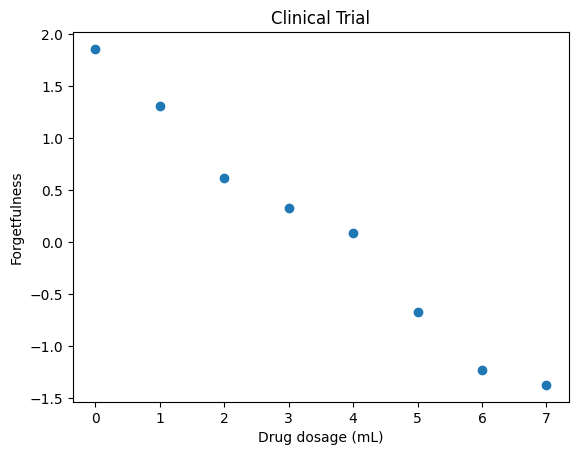

In [134]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

```Initialize the slope parameter  𝑚  with a "random" value of 0.9...```

```(N.B.: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)```

In [135]:
m = torch.tensor([0.9]).requires_grad_()

```Do the same for the  𝑦 -intercept parameter  𝑏 :```

In [136]:
b= torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [137]:
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [138]:
def regression_plot(my_x, my_y, my_m, my_b):  
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

```The detach() method is used to detach the result from the computation graph. This means that gradients will not be calculated for y_min and it will be treated as a constant value during backpropagation.```

```Finally, the item() method is called on the detached tensor to retrieve its value as a standard Python float. This is necessary because the result of the detach() operation is still a tensor, and calling item() converts it to a Python scalar.```

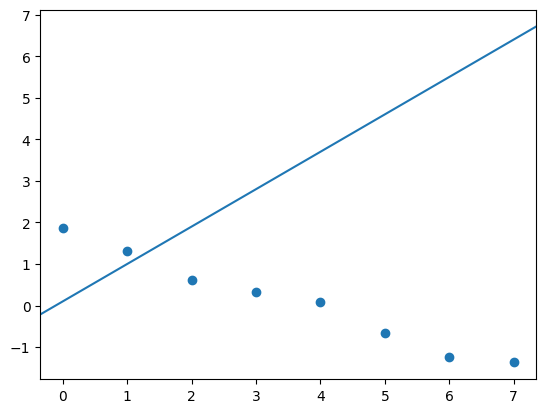

In [139]:
regression_plot(x, y, m, b)

##### <b>`Step 1: Forward pass`

In [140]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

##### <b>` Step 2: Compare  𝑦̂   with true  𝑦  to calculate cost  𝐶`

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C =\frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [141]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [142]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

##### <b>`Step 3: Use autodiff to calculate gradient of  𝐶  w.r.t. parameters`

In [143]:
C.backward()

In [144]:
m.grad

tensor([36.3050])

In [145]:
b.grad

tensor([6.2650])

##### <b>`Step 4: Gradient descent`

In [146]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [147]:
optimizer.step()

#Confirm parameters have been adjusted sensibly:

In [148]:
m

tensor([0.5369], requires_grad=True)

In [149]:
b

tensor([0.0374], requires_grad=True)

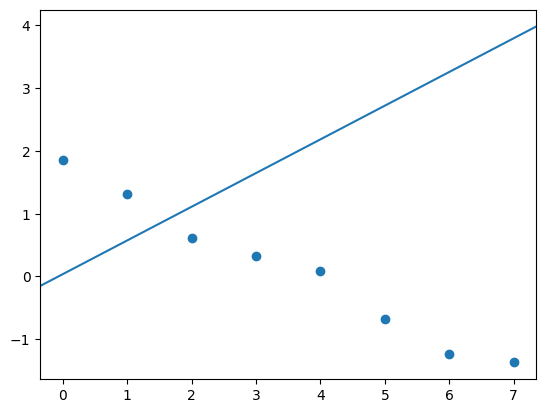

In [150]:
regression_plot(x, y, m, b)

`We can repeat steps 1 and 2 to confirm cost has decreased:`

In [151]:
C = mse(regression(x, m, b), y)
print(C)

tensor(8.5722, grad_fn=<DivBackward0>)


`Put the 4 steps in a loop to iteratively minimize cost toward zero:`

In [158]:
epochs = 1000

for epoch in range(epochs):
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2    
    C.backward() # Step 3
    optimizer.step() # Step 4
        
    print('Epoch {},\tcost {},\tm_grad {},\tb_grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 1,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 2,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 3,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 4,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 5,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 6,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 7,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 8,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 9,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 10,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 11,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 12,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 13,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 14,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 15,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 16,	cost 0.0195,	m_grad 1.37e-06,	b_grad -5.81e-06
Epoch 17,	cost 0.0195,	m_grad 1.37e-06,	b

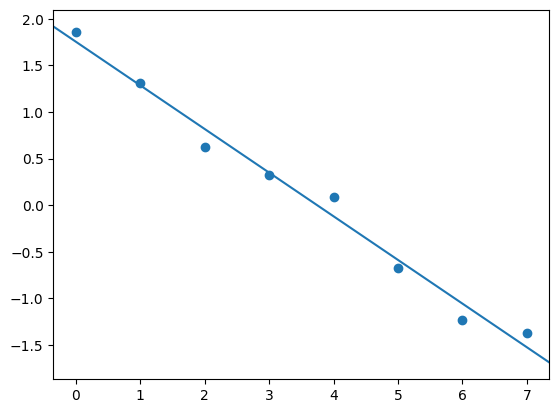

In [153]:
regression_plot(x, y, m, b)

In [159]:
m.item()

-0.4692836403846741

In [160]:
b.item()

1.759989857673645

# <p style = 'text-align:center'><font color = green|><b>The End 